# Importing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('bank-additional-full.csv', delimiter= ';')

In [3]:
#Changing target to 1 or 0
df['y']= (df.y=='yes')*1

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Previous + Campaign

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
#Looking at 'poutcome column, surprised to see previous call failure had more successes than no previous calls
df.groupby('poutcome').mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
poutcome,,,,,,,,,,,
failure,39.946143,248.112888,2.005174,965.976011,1.168627,-1.685442,93.067755,-42.720461,1.651071,5092.589534,0.142286
nonexistent,39.956190,257.082192,2.664145,999.000000,0.000000,0.377091,93.645708,-40.319045,3.958189,5181.203492,0.088322
success,42.023307,320.941733,1.808449,5.587764,1.569556,-2.091260,93.334355,-38.388565,0.996563,5030.622433,0.651129


In [7]:
#Creating dummies for 'poutcome'
df['pcall']=(df.poutcome!='nonexistent')*1
df['poutcome']=1*(df.poutcome=='success')

In [8]:
#999 is by far the most frequent
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [9]:
#999 is much lower than everything else, other than 20 which has a sample of 1. 
#Will change column to 0 for 999, 1 for other
df.groupby('pdays').mean()[['y']].sort_values(by='y')

,y
pdays,
20,0.000000
999,0.092582
17,0.250000
1,0.307692
19,0.333333
12,0.448276
4,0.533898
11,0.535714
16,0.545455


In [10]:
df['pdays']=1*(df.pdays<500)

In [11]:
df.campaign.value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [12]:
#Lots of 0s after 15, so will set all values above 15 = 15 for smoother behaviour
df.groupby('campaign').mean()

,age,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pcall
campaign,,,,,,,,,,,,
1,40.081623,256.725428,0.045176,0.205589,0.041038,-0.117022,93.515306,-40.442223,3.429431,5158.543062,0.130371,0.161603
2,39.966887,279.696973,0.041911,0.189026,0.037843,0.032299,93.569815,-40.482015,3.578328,5164.611296,0.114570,0.149480
3,39.825501,270.002060,0.029395,0.137427,0.026961,0.280715,93.632654,-40.451301,3.809803,5174.957499,0.107471,0.106534
4,39.962278,251.502075,0.019992,0.128631,0.018106,0.305206,93.642278,-40.688495,3.822564,5176.362731,0.093927,0.102603
5,40.132583,227.759225,0.017511,0.107567,0.016260,0.311194,93.613375,-40.761288,3.825455,5178.184053,0.075047,0.088180
6,40.367722,225.955056,0.020429,0.131767,0.017365,0.326251,93.646970,-41.022472,3.824324,5178.819101,0.076609,0.109295
7,40.108108,223.330684,0.014308,0.093800,0.014308,0.485851,93.657992,-40.691415,3.999479,5185.707631,0.060413,0.076312
8,39.385000,189.525000,0.015000,0.087500,0.012500,0.549000,93.705062,-41.171000,4.044242,5189.874500,0.042500,0.080000
9,40.674912,211.526502,0.000000,0.038869,0.000000,0.802473,93.734127,-40.057244,4.352912,5198.411307,0.060071,0.035336


In [13]:
df.campaign=df.campaign*(df.campaign<15)+ 15*(df.campaign>=15)

In [14]:
df.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [15]:
#Much lower for 0 than everything else, but also seems to be steadily increasing thereafter, will leave it as is
df.groupby('previous').mean()[['y']]

,y
previous,
0,0.088322
1,0.212015
2,0.464191
3,0.592593
4,0.542857
5,0.722222
6,0.600000
7,0.000000


# Numerical Columns y Effect

In [16]:
#Seeing how different variables relate to 'y'
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pcall
y,,,,,,,,,,,,
0,39.911185,220.844807,2.568485,0.014994,0.132374,0.013106,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.112893
1,40.913147,553.191164,2.048276,0.208405,0.492672,0.192672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0.323060


In [17]:
#Removing 'duration' as it is too strong of a predictor, and something you probably learn after the fact
try:
    del df['duration']
except:
    pass

# Economics

In [18]:
#Creating df with only numerical columns meausring the economy 
df_econ= df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
df_econ.corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


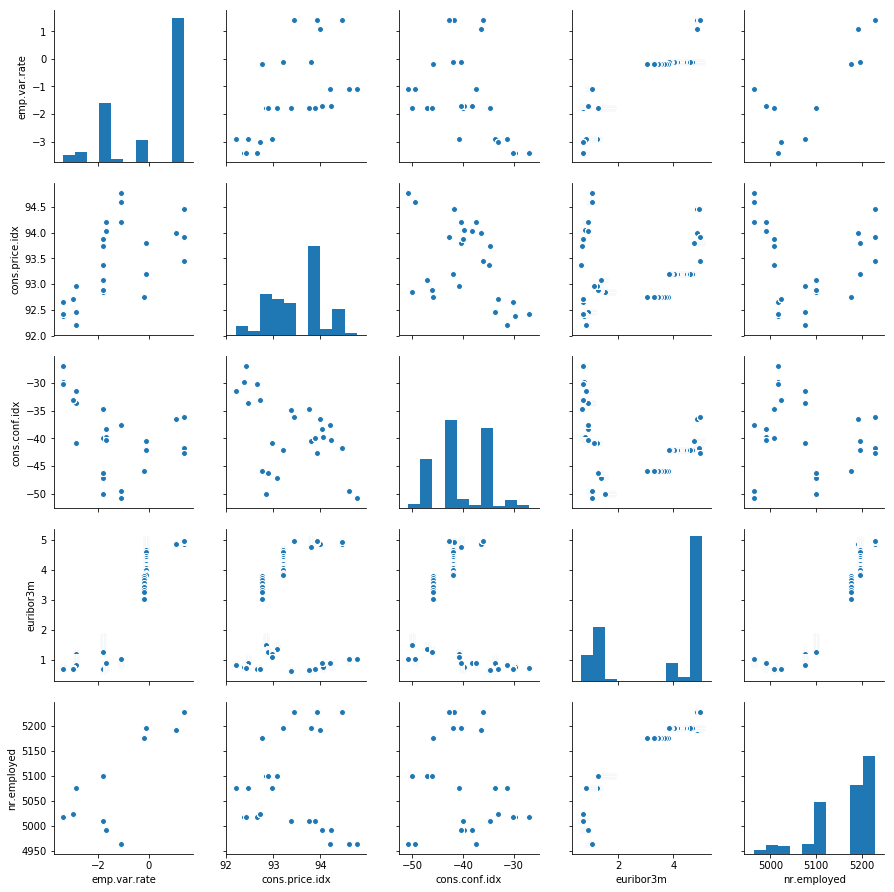

In [19]:
#Seemingly no outliers
sns.pairplot(df_econ)

In [20]:
#Since df emp.var.rate,euribor and nr employed are so highly correlated, I will remove euribor3m and nr employed
try: 
    del df['euribor3m']
    del df['nr.employed']
except:
    pass

#  Demographics

In [21]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [22]:
#divorced and marriage seem very similar in age and y
#only 80 unknown points, so will drop them.
#Will marital change column to 0 for single, 1 for married/divorced
df.groupby('marital').mean()[['age','y']]

,age,y
marital,,
divorced,44.899393,0.103209
married,42.307165,0.101573
single,33.158714,0.140041
unknown,40.275000,0.150000


In [23]:
df=df[df.marital!='unkown']
df.marital=1-(df.marital=='single')

In [24]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [25]:
df.groupby('education').mean()[['age','y']]

,age,y
education,,
basic.4y,47.596504,0.102490
basic.6y,40.448953,0.082024
basic.9y,39.061208,0.078246
high.school,37.998213,0.108355
illiterate,48.500000,0.222222
professional.course,40.080107,0.113485
university.degree,38.879191,0.137245
unknown,43.481225,0.145003


In [26]:
#Dropping unknowns in education column, as not enough info to predict, and illetrate as not many illiterate people
df=df[df.education!='illiterate']
df=df[df.education!='unkown']

In [27]:
#grouping education by basic, high school/course, and university as 0,1,2
df.education= 1*(df.education.isin(['high.school', 'professional.course'])) + 2*(df.education=='university.degree')

In [28]:
#Counts for diff jobs
df.groupby('job').count()['age']

job
admin.           10421
blue-collar       9246
entrepreneur      1454
housemaid         1059
management        2924
retired           1717
self-employed     1418
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: age, dtype: int64

In [29]:
#Grouping by job, looking at age and 'y', we see that youngest and oldest people most likely to take loans
#entrepreneur, services, blue-collar less likely to take loan
df.groupby('job').mean()[['age', 'y']].sort_values(by='y', ascending=False)

,age,y
job,,
student,25.894857,0.314286
retired,62.040186,0.251602
unemployed,39.733728,0.142012
admin.,38.186067,0.129738
management,42.362859,0.112175
unknown,45.563636,0.112121
technician,38.507638,0.108260
self-employed,39.961918,0.104372
housemaid,45.486308,0.100094


In [30]:
#Creating age buckets to investigate effect of age further
# We can see that youngest and oldest people have most successes, as suspected earlier
#Will create (age-40)^2 as a new column to account for this
df['age_bucket']=pd.cut(df.age, [0,25,30,35,45,55,99])
df.groupby('age_bucket').mean()[['y']]

,y
age_bucket,
"(0, 25]",0.209484
"(25, 30]",0.135561
"(30, 35]",0.105621
"(35, 45]",0.085060
"(45, 55]",0.086872
"(55, 99]",0.206704


In [31]:
df['age2']=(df.age-40)**2

In [32]:
#Looking at 'y' figures betwen age buckets. y for students above 35 goes down to 10%
#blue collar, services, and entrepreneur generally below age group
#Old retired have high 'y'
#Should creat columns 'young student', 'old retired', blue collar/services/entrepreneur (rejecter)
c=df.groupby(['age_bucket', 'job']).count()[['y']]
pd.set_option('display.max_rows', 100)
aj=df.groupby(['age_bucket', 'job']).mean()[['y']]
aj['count']=c.y
aj

y   count
age_bucket job                            
(0, 25]    admin.         0.187302   315.0
           blue-collar    0.091743   327.0
           entrepreneur   0.050000    20.0
           housemaid      0.000000    11.0
           management     0.157895    38.0
           retired        0.000000     1.0
           self-employed  0.200000    40.0
           services       0.142276   246.0
           student        0.365639   454.0
           technician     0.163743   171.0
           unemployed     0.285714    35.0
           unknown        0.750000     8.0
(25, 30]   admin.         0.168760  1831.0
           blue-collar    0.078179  1164.0
           entrepreneur   0.110169   118.0
           housemaid      0.104167    48.0
           management     0.144737   228.0
           retired        0.000000     4.0
           self-employed  0.145455   220.0
           services       0.083707   669.0
           student        0.276596   282.0
           technician     0.130785   994.0
           unemployed     0.186567   134.0
           unknown        0.120000    25.0
(30, 35]   admin.         0.121026  2768.0
           blue-collar    0.080021  1937.0
           entrepreneur   0.083333   264.0
           housemaid      0.059701   134.0
           management     0.097473   554.0
           retired        0.111111     9.0
           self-employed  0.089286   280.0
           services       0.092077   934.0
           student        0.257732    97.0
           technician     0.116341  1891.0
           unemployed     0.135514   214.0
           unknown        0.088889    45.0
(35, 45]   admin.         0.102362  3175.0
           blue-collar    0.057211  3356.0
           entrepreneur   0.085610   549.0
           housemaid      0.058309   343.0
           management     0.111328  1024.0
           retired        0.041667    48.0
           self-employed  0.113006   469.0
           services       0.077750  1209.0
           student        0.102564    39.0
           technician     0.090160  2185.0
           unemployed     0.106628   347.0
           unknown        0.074468    94.0
(45, 55]   admin.         0.121162  1824.0
           blue-collar    0.065217  2024.0
           entrepreneur   0.067708   384.0
           housemaid      0.090909   341.0
           management     0.091954   783.0
           retired        0.087542   297.0
           self-employed  0.062500   304.0
           services       0.058745   749.0
           student        0.666667     3.0
           technician     0.094371  1208.0
           unemployed     0.114537   227.0
           unknown        0.030612    98.0
(55, 99]   admin.         0.202756   508.0
           blue-collar    0.086758   438.0
           entrepreneur   0.117647   119.0
           housemaid      0.230769   182.0
           management     0.164983   297.0
           retired        0.296760  1358.0
           self-employed  0.104762   105.0
           services       0.049383   162.0
           student             NaN     NaN
           technician     0.139456   294.0
           unemployed     0.298246    57.0
           unknown        0.233333    60.0

In [33]:
df['young_student']= 1*(df['job']=='student')*(df['age']<35)
df['rejecter']= 1*(df['job'].isin(['blue-collar', 'services', 'entrepreneur']))
df['old_retired']=1*(df['job']=='retired')*(df['age']>55)

In [34]:
del df['age_bucket']

In [35]:
del df['job']

# Personal Finances

In [36]:
#Since only 3 are yes, will drop them, 0 for 'no', yes for else
df.default.value_counts()

no         32577
unknown     8590
yes            3
Name: default, dtype: int64

In [37]:
df=df[df.default.astype(str)!='yes']

In [38]:
df['default']= 1*(df.default.astype(str)!='no')

In [39]:
df.loan.value_counts()

no         33932
yes         6245
unknown      990
Name: loan, dtype: int64

In [40]:
#Unclear relationships, so will have to drop unknwons, will turn no into 0 and yes into 1
df.groupby('loan').mean()

,age,marital,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pcall,age2,young_student,rejecter,old_retired
loan,,,,,,,,,,,,,,,,,
no,40.055876,0.720058,0.945892,0.209065,2.502918,0.036868,0.173111,0.033538,0.080172,93.575539,-40.481457,0.113374,0.136508,108.852175,0.019510,0.357214,0.033538
unknown,39.951515,0.717172,0.908081,0.229293,2.505051,0.034343,0.184848,0.028283,0.113434,93.636011,-40.289192,0.108081,0.140404,107.674747,0.021212,0.380808,0.035354
yes,39.837150,0.713691,0.976141,0.203203,2.549720,0.036669,0.170376,0.032986,0.086421,93.567623,-40.654075,0.109207,0.136269,107.176461,0.020496,0.347638,0.029624


In [41]:
df=df[df.loan!='unkown']
df.loan=1*(df.loan=='yes')

# Misc.

In [42]:
df.columns

Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'y', 'pcall', 'age2',
       'young_student', 'rejecter', 'old_retired'],
      dtype='object')

In [43]:
#Only 2 options, so cellular 0, telephone 1
df.contact.value_counts()

cellular     26126
telephone    15041
Name: contact, dtype: int64

In [44]:
df.groupby('contact').mean()

,age,marital,education,default,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pcall,age2,young_student,rejecter,old_retired
contact,,,,,,,,,,,,,,,,,,
cellular,39.962872,0.694710,1.022621,0.166845,0.155362,2.368560,0.053625,0.252928,0.048572,-0.387442,93.315960,-41.386565,0.147363,0.199763,119.914491,0.024420,0.315701,0.039080
telephone,40.119739,0.761253,0.822685,0.281298,0.145336,2.755867,0.007513,0.034107,0.006848,0.897194,94.027119,-38.968313,0.052257,0.026793,88.863839,0.011502,0.426900,0.022405


In [45]:
df['contact']= 1*(df.contact=='telephone')

In [46]:
df.month.value_counts()

may    13766
jul     7169
aug     6171
jun     5318
nov     4097
apr     2630
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [47]:
#Months with fewer calls seem to have more successes
#Will replace 'month' with log(calls) made in that month
df.groupby('month').mean()[['y']]

,y
month,
apr,0.204563
aug,0.105818
dec,0.489011
jul,0.090529
jun,0.105115
mar,0.505495
may,0.064361
nov,0.101294
oct,0.438719


In [48]:
m_dic=dict(df.month.value_counts())

In [49]:
m_col=list(df.month)

In [50]:
new_mo=[]
for m in m_col:
    n=m_dic[m]
    new_mo.append(np.log(n))

In [51]:
df.month=new_mo

In [52]:
df.day_of_week.value_counts()

thu    8617
mon    8513
wed    8132
tue    8082
fri    7823
Name: day_of_week, dtype: int64

In [53]:
#Dropping column as not much diff from data mean
df.groupby('day_of_week').mean()

,age,marital,education,default,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pcall,age2,young_student,rejecter,old_retired
day_of_week,,,,,,,,,,,,,,,,,,,,
fri,40.174741,0.721974,0.941455,0.212067,0.156206,0.406622,8.798068,2.659082,0.031446,0.177553,0.028250,0.032085,93.578804,-40.533197,0.108143,0.143679,107.496229,0.019302,0.357663,0.031957
mon,40.411253,0.728063,0.966992,0.214378,0.156584,0.349935,8.753801,2.587102,0.036415,0.171033,0.032538,0.025902,93.577068,-40.877575,0.099495,0.135088,105.606837,0.018560,0.352637,0.033243
thu,39.590229,0.705582,0.965997,0.204944,0.150981,0.326912,8.736865,2.503191,0.039805,0.174423,0.036440,0.058826,93.556566,-40.751921,0.121040,0.136939,108.081815,0.021237,0.352443,0.029012
tue,40.414130,0.726305,0.936154,0.210963,0.144519,0.369092,8.821549,2.389879,0.039470,0.172977,0.035882,0.127679,93.577170,-40.034707,0.117793,0.135363,112.292626,0.019673,0.349542,0.036501
wed,39.526193,0.713724,0.935071,0.201058,0.150148,0.378874,8.841590,2.412814,0.036399,0.169085,0.033202,0.167499,93.590567,-40.283571,0.116576,0.132071,109.520782,0.019675,0.369774,0.034432


In [54]:
try:
    del df['day_of_week']
except:
    pass

In [55]:
df['housing'].value_counts()

yes        21565
no         18612
unknown      990
Name: housing, dtype: int64

In [56]:
#Unclear relationships, dropping 'unknown'
df.groupby('housing').mean()

,age,marital,education,default,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y,pcall,age2,young_student,rejecter,old_retired
housing,,,,,,,,,,,,,,,,,,,,
no,40.041317,0.726144,0.935687,0.215076,0.137331,0.406619,8.815342,2.542983,0.034709,0.161186,0.031109,0.184182,93.624989,-40.338722,0.108801,0.127069,106.841876,0.019020,0.363099,0.033204
unknown,39.951515,0.717172,0.908081,0.229293,0.000000,0.433333,8.793120,2.505051,0.034343,0.184848,0.028283,0.113434,93.636011,-40.289192,0.108081,0.140404,107.674747,0.021212,0.380808,0.035354
yes,40.005101,0.712961,0.963459,0.202179,0.171064,0.326640,8.766668,2.481892,0.038674,0.182611,0.035474,-0.007786,93.530568,-40.654635,0.116114,0.144586,110.101924,0.020218,0.349362,0.032692


In [57]:
df=df[df.housing!='unkown']

In [58]:
#Converting housing to 0,1
df.housing=1*(df.housing=='yes')

In [59]:
df.shape

(41167, 21)

In [60]:
df.to_csv('cleaned_bank.csv')